Inisialisasi & Konfigurasi

In [1]:
import os
from dotenv import load_dotenv
# from sqlalchemy import create_engine # Tidak lagi dibutuhkan untuk cleaned data
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

load_dotenv()

# CSV Path
dataFrame = pd.read_csv('B:\GitHub Repository\Automated-Crypto-Market-Insights\cleaning\cleaned_data.csv',)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
dataFrame

,id,name,symbol,cmc_rank,price,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,last_updated_utc+0,timestamp_utc+0
0,1,Bitcoin,BTC,1,118251.148582,6.351810e+10,2.353120e+12,0.180263,-0.511674,0.066370,2025-07-30 09:21:00+00:00,2025-07-30 09:22:49+00:00
1,1,Bitcoin,BTC,1,118222.548598,6.336142e+10,2.352551e+12,0.108250,-0.552733,0.077521,2025-07-30 09:27:00+00:00,2025-07-30 09:28:48+00:00
2,1,Bitcoin,BTC,1,118085.282038,6.337359e+10,2.349820e+12,-0.016901,-0.658436,-0.004843,2025-07-30 09:34:00+00:00,2025-07-30 09:34:49+00:00
3,1,Bitcoin,BTC,1,118026.710620,6.332987e+10,2.348654e+12,-0.161087,-0.649496,-0.125019,2025-07-30 09:39:00+00:00,2025-07-30 09:40:48+00:00
4,1,Bitcoin,BTC,1,118048.130320,6.332775e+10,2.349082e+12,-0.260655,-0.708079,-0.107081,2025-07-30 09:46:00+00:00,2025-07-30 09:46:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
27094,36507,Pump.fun,PUMP,74,0.002865,6.175985e+08,1.014217e+09,0.946257,-1.819080,14.873509,2025-08-01 15:15:00+00:00,2025-08-01 15:16:49+00:00
27095,36507,Pump.fun,PUMP,76,0.002834,6.160844e+08,1.003162e+09,-0.842858,-3.313106,13.413673,2025-08-01 15:20:00+00:00,2025-08-01 15:22:49+00:00
27096,36507,Pump.fun,PUMP,76,0.002826,6.165259e+08,1.000387e+09,-3.852779,-3.552395,12.548553,2025-08-01 15:26:00+00:00,2025-08-01 15:28:49+00:00
27097,36507,Pump.fun,PUMP,76,0.002823,6.147572e+08,9.994363e+08,-3.431739,-5.133691,12.187295,2025-08-01 15:33:00+00:00,2025-08-01 15:34:49+00:00


1. Analisis Korelasi

Pilih kolom yang relevan untuk analisis korelasi
Asumsikan Anda ingin melihat korelasi antara rank dengan nilai rata-rata dari metrics lain
Jika dataFrame Anda berisi multiple entries for the same ID (historical data),
sebaiknya ambil data terakhir atau rata-rata per koin untuk analisis korelasi rank.
Untuk tujuan korelasi rank secara umum, kita bisa mengambil snapshot terakhir
atau melakukan rata-rata jika rank cenderung stabil untuk koin yang sama.
Untuk kesederhanaan, mari kita asumsikan dataFrame mewakili snapshot atau kita ingin melihat
korelasi dari setiap baris data yang ada (termasuk historical jika ada).
Jika Anda hanya ingin korelasi untuk rank saat ini, Anda mungkin perlu memfilter dataFrame
untuk hanya menyertakan entri terbaru per id.


--- ANALISIS KORELASI DENGAN CMC RANKING ---
Menggunakan data terbaru per koin untuk analisis korelasi.

Matriks Korelasi:
                    cmc_rank  market_cap  volume_24h     price  \
cmc_rank            1.000000   -0.254502   -0.315293 -0.173720   
market_cap         -0.254502    1.000000    0.589169  0.980192   
volume_24h         -0.315293    0.589169    1.000000  0.501952   
price              -0.173720    0.980192    0.501952  1.000000   
percent_change_1h  -0.016792    0.049727    0.137320  0.045052   
percent_change_24h -0.212491    0.088026    0.223722  0.081201   
percent_change_7d  -0.183463    0.093368    0.131794  0.072382   

                    percent_change_1h  percent_change_24h  percent_change_7d  
cmc_rank                    -0.016792           -0.212491          -0.183463  
market_cap                   0.049727            0.088026           0.093368  
volume_24h                   0.137320            0.223722           0.131794  
price                        0.

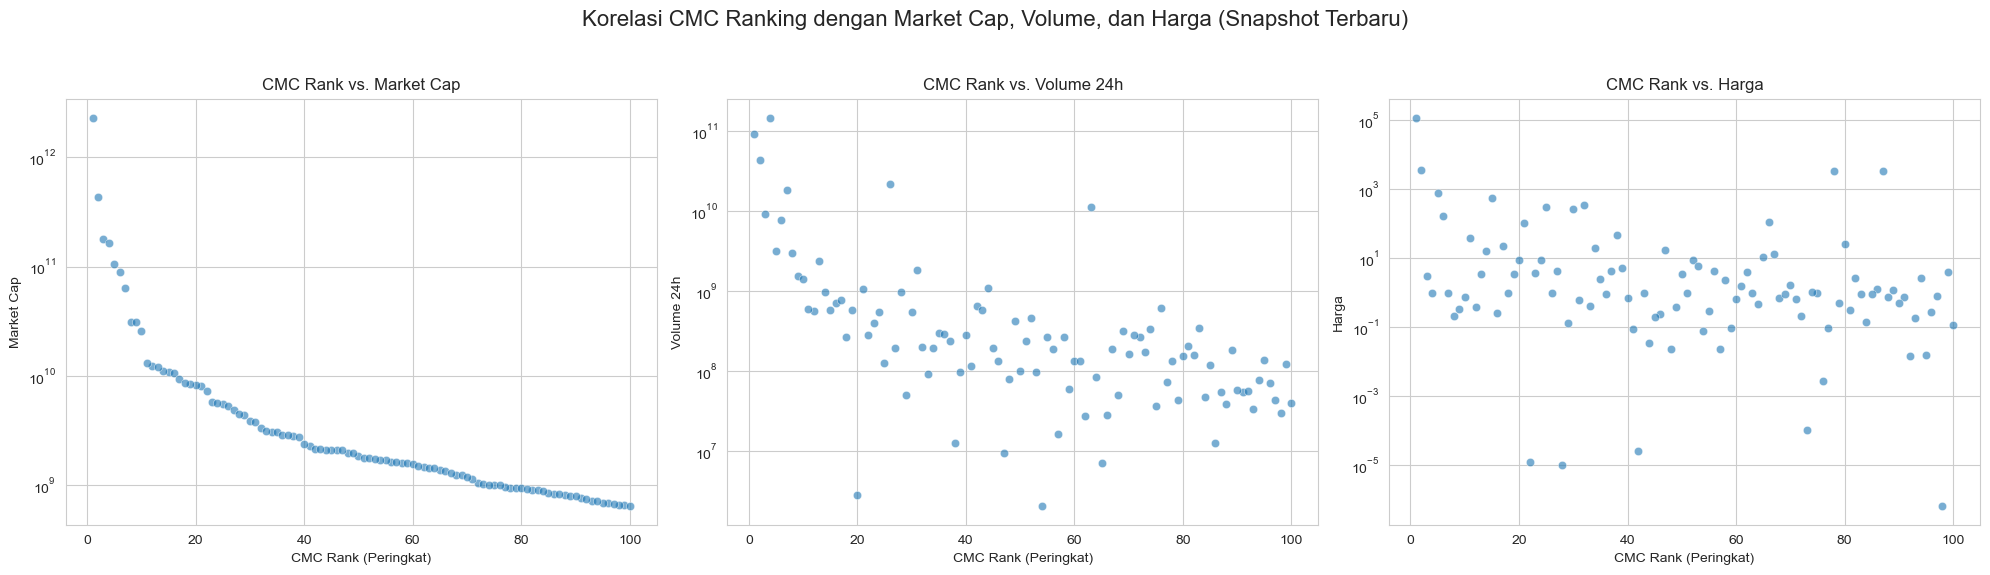

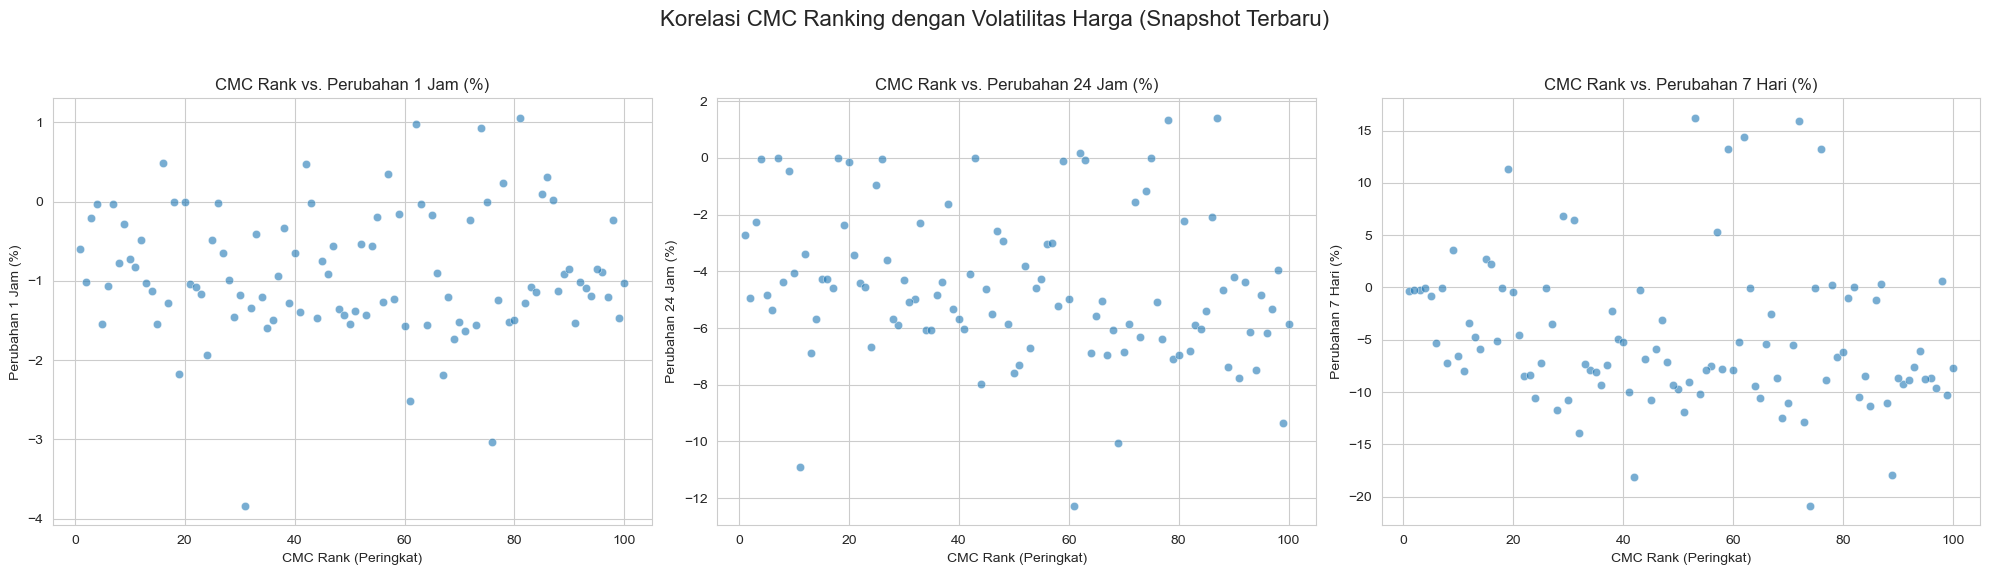

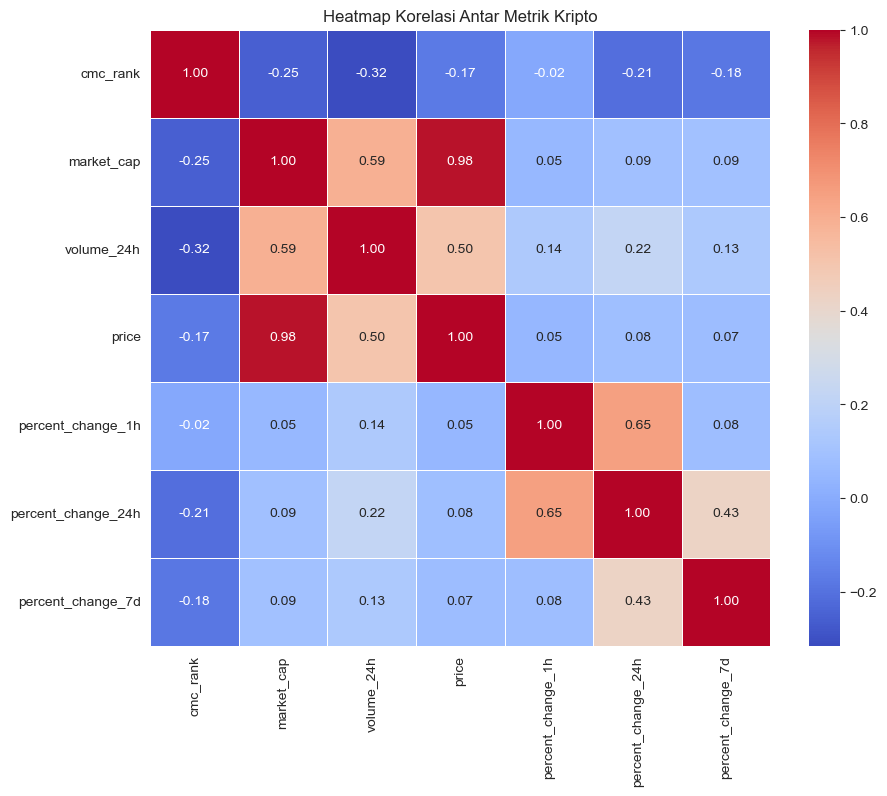


--- RINGKASAN INTERPRETASI KORELASI ---
1. Korelasi CMC Ranking dengan Market Cap, Volume, dan Harga:
   - Kita akan mengharapkan korelasi negatif yang kuat. Artinya, semakin rendah angkanya (misalnya, rank 1), semakin tinggi market cap, volume, atau harganya.
   - Scatter plot akan menunjukkan tren menurun.
2. Korelasi CMC Ranking dengan Volatilitas Harga (Percent Change):
   - Korelasi ini biasanya lebih lemah atau tidak linear. Koin dengan rank tinggi (yang lebih 'established') mungkin memiliki volatilitas yang lebih rendah karena ukurannya, tetapi koin rank menengah atau bahkan yang sangat rendah bisa jadi sangat volatil.
   - Scatter plot mungkin tidak menunjukkan tren yang jelas.


In [3]:
print("\n--- ANALISIS KORELASI DENGAN CMC RANKING ---")

# Contoh: Ambil entri unik berdasarkan ID, dengan timestamp terbaru
# (Ini penting jika dataFrame Anda mengandung data historis yang duplikat ID)
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
    print("Menggunakan data terbaru per koin untuk analisis korelasi.")
else:
    latest_data = dataFrame.copy() # Jika tidak ada timestamp, gunakan semua data
    print("Kolom 'timestamp_utc+0' tidak ditemukan, menggunakan semua data dalam DataFrame.")

# Pastikan kolom 'cmc_rank' adalah tipe numerik
latest_data['cmc_rank'] = pd.to_numeric(latest_data['cmc_rank'], errors='coerce')
latest_data.dropna(subset=['cmc_rank'], inplace=True)

correlation_cols = ['cmc_rank', 'market_cap', 'volume_24h', 'price',
                    'percent_change_1h', 'percent_change_24h', 'percent_change_7d']

# Pastikan semua kolom ada di DataFrame
available_cols = [col for col in correlation_cols if col in latest_data.columns]
if len(available_cols) < len(correlation_cols):
    print(f"Peringatan: Beberapa kolom korelasi tidak ditemukan di DataFrame: {list(set(correlation_cols) - set(available_cols))}")

# Hitung matriks korelasi untuk kolom yang tersedia
correlation_matrix = latest_data[available_cols].corr()

print("\nMatriks Korelasi:")
print(correlation_matrix)

print("\nKorelasi CMC Ranking dengan Metrik Lain:")
if 'cmc_rank' in correlation_matrix.columns:
    print(correlation_matrix['cmc_rank'].drop('cmc_rank')) # Tampilkan korelasi 'cmc_rank' dengan yang lain
else:
    print("Kolom 'cmc_rank' tidak ditemukan di DataFrame.")

# --- 2. Visualisasi Korelasi ---

# Scatter Plot: CMC Rank vs. Market Cap, Volume, Price
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Korelasi CMC Ranking dengan Market Cap, Volume, dan Harga (Snapshot Terbaru)', fontsize=16)

# CMC Rank vs Market Cap
if 'cmc_rank' in latest_data.columns and 'market_cap' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='market_cap', data=latest_data, ax=axes[0], alpha=0.6)
    axes[0].set_title('CMC Rank vs. Market Cap')
    axes[0].set_xlabel('CMC Rank (Peringkat)')
    axes[0].set_ylabel('Market Cap')
    axes[0].set_yscale('log') # Market Cap seringkali lebih baik divisualisasikan dengan skala log
else:
    axes[0].set_title('Data tidak tersedia untuk CMC Rank vs. Market Cap')

# CMC Rank vs Volume 24h
if 'cmc_rank' in latest_data.columns and 'volume_24h' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='volume_24h', data=latest_data, ax=axes[1], alpha=0.6)
    axes[1].set_title('CMC Rank vs. Volume 24h')
    axes[1].set_xlabel('CMC Rank (Peringkat)')
    axes[1].set_ylabel('Volume 24h')
    axes[1].set_yscale('log') # Volume juga seringkali lebih baik dengan skala log
else:
    axes[1].set_title('Data tidak tersedia untuk CMC Rank vs. Volume 24h')

# CMC Rank vs Price
if 'cmc_rank' in latest_data.columns and 'price' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='price', data=latest_data, ax=axes[2], alpha=0.6)
    axes[2].set_title('CMC Rank vs. Harga')
    axes[2].set_xlabel('CMC Rank (Peringkat)')
    axes[2].set_ylabel('Harga')
    axes[2].set_yscale('log') # Harga juga bisa jadi log tergantung distribusinya
else:
    axes[2].set_title('Data tidak tersedia untuk CMC Rank vs. Harga')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout untuk judul utama
plt.show()

# Scatter Plot: CMC Rank vs. Volatilitas (Percent Change)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Korelasi CMC Ranking dengan Volatilitas Harga (Snapshot Terbaru)', fontsize=16)

# CMC Rank vs Percent Change 1h
if 'cmc_rank' in latest_data.columns and 'percent_change_1h' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='percent_change_1h', data=latest_data, ax=axes[0], alpha=0.6)
    axes[0].set_title('CMC Rank vs. Perubahan 1 Jam (%)')
    axes[0].set_xlabel('CMC Rank (Peringkat)')
    axes[0].set_ylabel('Perubahan 1 Jam (%)')
else:
    axes[0].set_title('Data tidak tersedia untuk CMC Rank vs. Perubahan 1 Jam (%)')

# CMC Rank vs Percent Change 24h
if 'cmc_rank' in latest_data.columns and 'percent_change_24h' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='percent_change_24h', data=latest_data, ax=axes[1], alpha=0.6)
    axes[1].set_title('CMC Rank vs. Perubahan 24 Jam (%)')
    axes[1].set_xlabel('CMC Rank (Peringkat)')
    axes[1].set_ylabel('Perubahan 24 Jam (%)')
else:
    axes[1].set_title('Data tidak tersedia untuk CMC Rank vs. Perubahan 24 Jam (%)')

# CMC Rank vs Percent Change 7d
if 'cmc_rank' in latest_data.columns and 'percent_change_7d' in latest_data.columns:
    sns.scatterplot(x='cmc_rank', y='percent_change_7d', data=latest_data, ax=axes[2], alpha=0.6)
    axes[2].set_title('CMC Rank vs. Perubahan 7 Hari (%)')
    axes[2].set_xlabel('CMC Rank (Peringkat)')
    axes[2].set_ylabel('Perubahan 7 Hari (%)')
else:
    axes[2].set_title('Data tidak tersedia untuk CMC Rank vs. Perubahan 7 Hari (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
if not correlation_matrix.empty:
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Heatmap Korelasi Antar Metrik Kripto')
    plt.show()
else:
    print("\nTidak dapat membuat Heatmap Korelasi karena matriks korelasi kosong.")


print("\n--- RINGKASAN INTERPRETASI KORELASI ---")
print("1. Korelasi CMC Ranking dengan Market Cap, Volume, dan Harga:")
print("   - Kita akan mengharapkan korelasi negatif yang kuat. Artinya, semakin rendah angkanya (misalnya, rank 1), semakin tinggi market cap, volume, atau harganya.")
print("   - Scatter plot akan menunjukkan tren menurun.")
print("2. Korelasi CMC Ranking dengan Volatilitas Harga (Percent Change):")
print("   - Korelasi ini biasanya lebih lemah atau tidak linear. Koin dengan rank tinggi (yang lebih 'established') mungkin memiliki volatilitas yang lebih rendah karena ukurannya, tetapi koin rank menengah atau bahkan yang sangat rendah bisa jadi sangat volatil.")
print("   - Scatter plot mungkin tidak menunjukkan tren yang jelas.")


Menggunakan data terbaru per koin untuk analisis.

--- ANALISIS PERSENTASE PERUBAHAN HARGA 24 JAM ---

📈 Top 5 Gainers (Perubahan 24 Jam):
  Tether Gold (XAUt): 1.42% 📈
  PAX Gold (PAXG): 1.33% 📈
  Four (FORM): 0.17% 📈
  World Liberty Financial USD (USD1): 0.01% 📈
  PayPal USD (PYUSD): -0.01% 📈

📉 Top 5 Losers (Perubahan 24 Jam):
  SPX6900 (SPX): -12.27% 📉
  Hyperliquid (HYPE): -10.90% 📉
  Curve DAO Token (CRV): -10.04% 📉
  Pendle (PENDLE): -9.34% 📉
  Pudgy Penguins (PENGU): -7.98% 📉


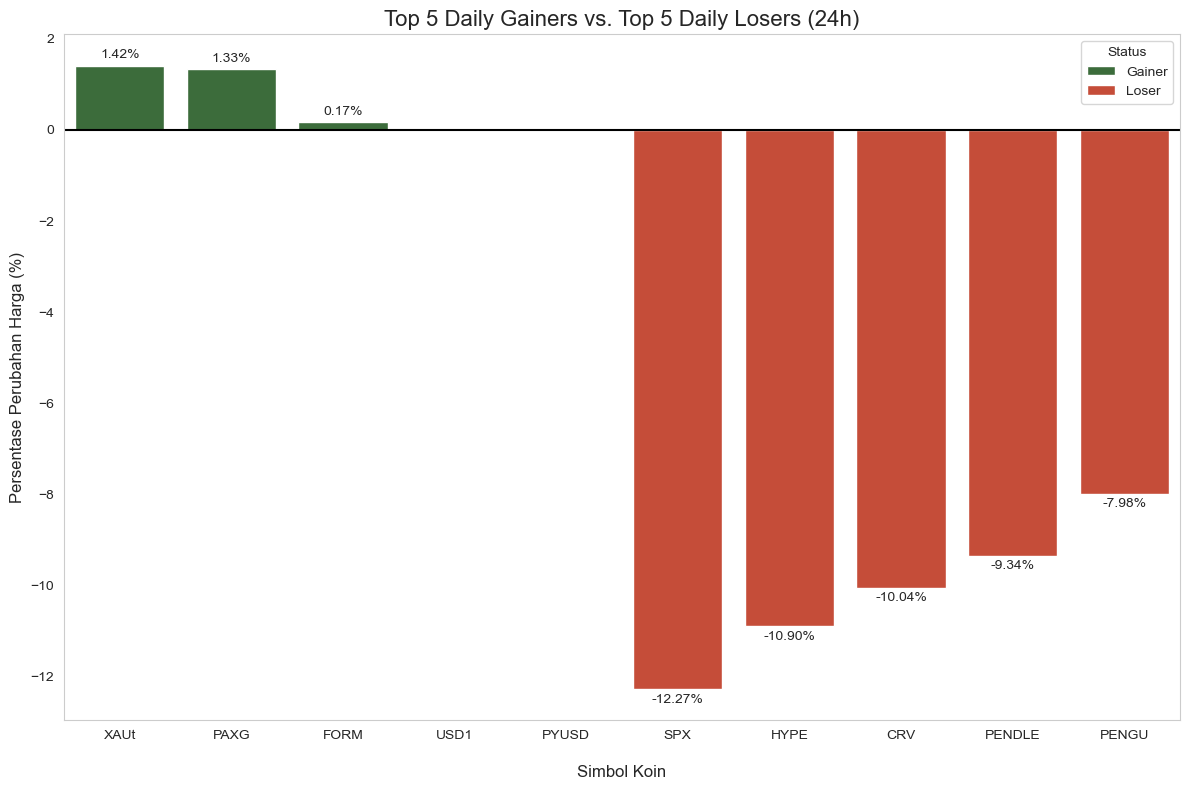

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'dataFrame' sudah dimuat di sini.
# Jika Anda tidak memiliki dataFrame, contohnya bisa seperti berikut:
# data = {'id': ['bitcoin', 'ethereum', 'dogecoin', 'solana', 'xrp', 'tether', 'cardano', 'shiba-inu', 'polkadot', 'litecoin'],
#         'name': ['Bitcoin', 'Ethereum', 'Dogecoin', 'Solana', 'XRP', 'Tether', 'Cardano', 'Shiba Inu', 'Polkadot', 'Litecoin'],
#         'symbol': ['BTC', 'ETH', 'DOGE', 'SOL', 'XRP', 'USDT', 'ADA', 'SHIB', 'DOT', 'LTC'],
#         'percent_change_24h': [1.5, 2.1, -5.2, 7.8, -1.1, 0.05, -3.4, 12.5, 0.9, -2.5],
#         'timestamp_utc+0': ['2025-07-31T10:00:00Z']*10}
# dataFrame = pd.DataFrame(data)

# Pastikan 'latest_data' tersedia dari sel analisis korelasi sebelumnya.
# Jika Anda tidak menjalankan sel korelasi, Anda bisa membuat 'latest_data' seperti ini:
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
    print("Menggunakan data terbaru per koin untuk analisis.")
else:
    latest_data = dataFrame.copy()
    print("Kolom 'timestamp_utc+0' tidak ditemukan, menggunakan semua data dalam DataFrame.")


# --- 1. Top 5 Gainers dan Losers (percent_change_24h) ---
print("\n--- ANALISIS PERSENTASE PERUBAHAN HARGA 24 JAM ---")

if 'percent_change_24h' in latest_data.columns:
    # Hapus baris dengan nilai NaN di 'percent_change_24h' agar tidak mengganggu sorting
    filtered_data = latest_data.dropna(subset=['percent_change_24h']).copy()

    # Top 5 Gainers (persentase terbesar)
    top_gainers = filtered_data.sort_values(by='percent_change_24h', ascending=False).head(5).copy()
    top_gainers['status'] = 'Gainer'

    # Top 5 Losers (persentase terkecil, yaitu paling negatif)
    top_losers = filtered_data.sort_values(by='percent_change_24h', ascending=True).head(5).copy()
    top_losers['status'] = 'Loser'

    print("\n📈 Top 5 Gainers (Perubahan 24 Jam):")
    for index, row in top_gainers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📈")

    print("\n📉 Top 5 Losers (Perubahan 24 Jam):")
    for index, row in top_losers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📉")

    # --- Visualisasi Bar Chart ---
    # Gabungkan data gainers dan losers untuk visualisasi tunggal
    combined_data = pd.concat([top_gainers, top_losers])
    
    # Urutkan ulang data untuk visualisasi yang lebih baik
    # Pastikan 'symbol' adalah kategori agar urutan tidak diacak
    combined_data['symbol'] = pd.Categorical(
        combined_data['symbol'], 
        categories=combined_data['symbol'], 
        ordered=True
    )

    plt.figure(figsize=(12, 8))
    
    # Tentukan palet warna kustom sesuai permintaan
    custom_palette = {'Gainer': '#347433', 'Loser': '#DC3C22'}
    
    # Buat bar plot dengan warna yang ditentukan
    ax = sns.barplot(
        x='symbol', 
        y='percent_change_24h', 
        hue='status', 
        data=combined_data, 
        palette=custom_palette, 
        dodge=False,
        order=combined_data['symbol']
    )
    
    # Tambahkan nilai persentase pada setiap bar
    for p in ax.patches:
        height = p.get_height()
        # Hilangkan label jika nilai mendekati nol
        if abs(height) > 0.01:
            if height >= 0:
                ax.text(p.get_x() + p.get_width() / 2., 
                        height + 0.1, # Posisi teks sedikit di atas bar
                        '{:1.2f}%'.format(height), 
                        ha='center', 
                        va='bottom',
                        fontsize=10)
            else:
                ax.text(p.get_x() + p.get_width() / 2., 
                        height - 0.1, # Posisi teks sedikit di bawah bar
                        '{:1.2f}%'.format(height), 
                        ha='center', 
                        va='top',
                        fontsize=10)
    
    # Hapus semua grid, lalu tambahkan garis horizontal di y=0
    ax.grid(False)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

    plt.title('Top 5 Daily Gainers vs. Top 5 Daily Losers (24h)', fontsize=16)
    plt.xlabel('\nSimbol Koin', fontsize=12)
    plt.ylabel('Persentase Perubahan Harga (%)', fontsize=12)
    plt.xticks(rotation=0) # Rotasi label sumbu x agar tidak bertumpuk
    plt.legend(title='Status', loc='upper right')
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'percent_change_24h' tidak ditemukan di DataFrame Anda.")


ANALISIS VOLUME PER JAM BITCOIN & ETHEREUM

--- ANALISIS VOLUME PER JAM BITCOIN & ETHEREUM ---


C:\Users\Asus\AppData\Local\Temp\ipykernel_7308\539481497.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_volume = btc_eth_data.groupby(['symbol', pd.Grouper(freq='H')])['volume_24h'].mean().reset_index()


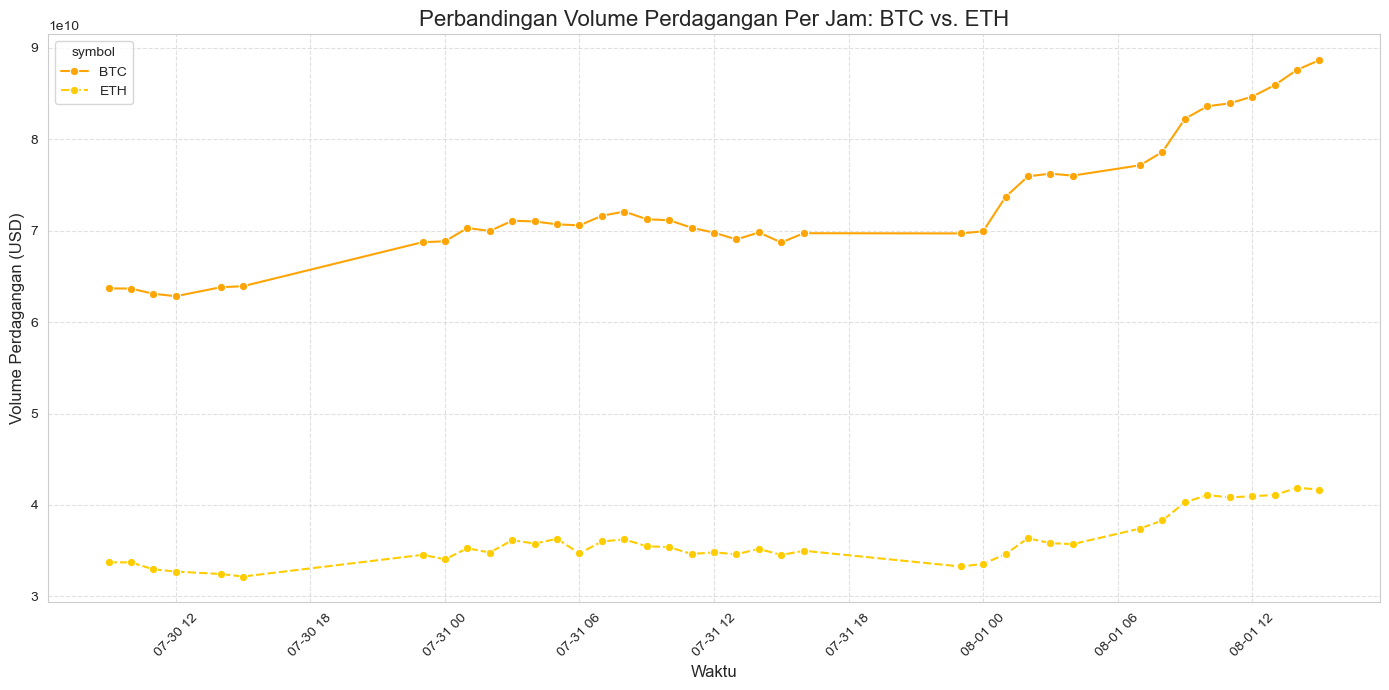


--- TABEL WAKTU VOLUME PERDAGANGAN TERTINGGI (SPAIK) ---
Tabel ini menunjukkan 3 jam dengan volume tertinggi untuk Bitcoin dan Ethereum.
symbol        timestamp   volume_24h
   BTC 2025-08-01 15:00 8.865540e+10
   BTC 2025-08-01 14:00 8.760063e+10
   BTC 2025-08-01 13:00 8.591568e+10
   ETH 2025-08-01 14:00 4.187078e+10
   ETH 2025-08-01 15:00 4.168523e+10
   ETH 2025-08-01 13:00 4.108386e+10


C:\Users\Asus\AppData\Local\Temp\ipykernel_7308\539481497.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')


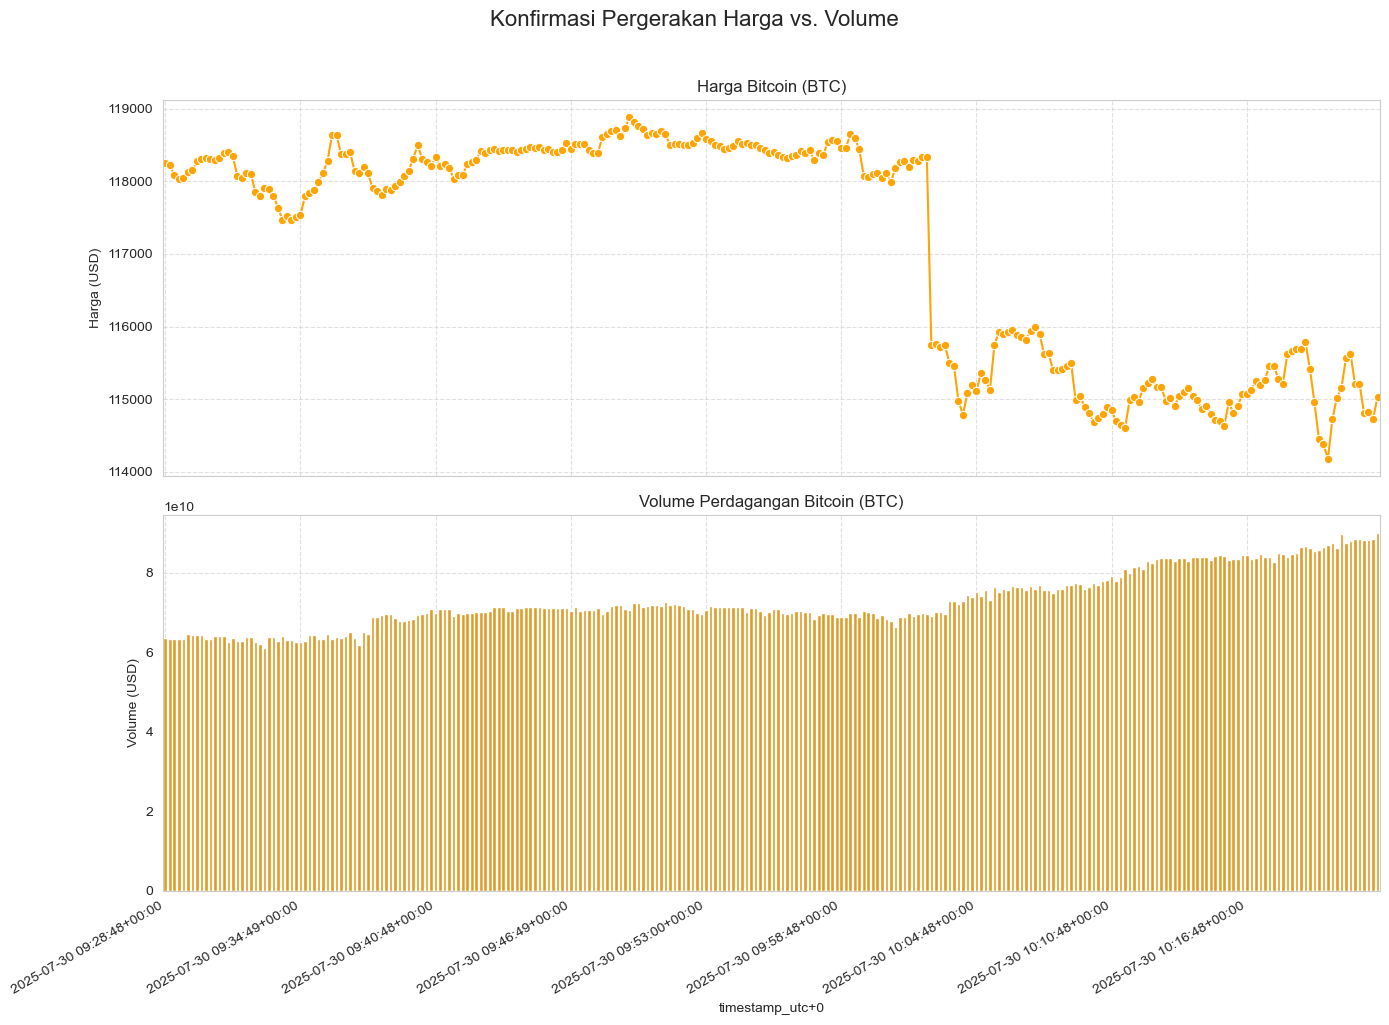

In [5]:
print("--- ANALISIS VOLUME PER JAM BITCOIN & ETHEREUM ---")

# Filter data hanya untuk Bitcoin dan Ethereum
btc_eth_data = dataFrame[dataFrame['symbol'].isin(['BTC', 'ETH'])].copy()

# Pastikan kolom waktu berformat datetime dan atur sebagai index
btc_eth_data['timestamp'] = pd.to_datetime(btc_eth_data['timestamp_utc+0'])
btc_eth_data.set_index('timestamp', inplace=True)

# Resampling data per jam untuk melihat tren volume
hourly_volume = btc_eth_data.groupby(['symbol', pd.Grouper(freq='H')])['volume_24h'].mean().reset_index()

# Visualisasi perbandingan volume per jam dengan line chart
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=hourly_volume,
    x='timestamp',
    y='volume_24h',
    hue='symbol',
    style='symbol',
    palette={'BTC': '#FEA405', 'ETH': '#FFCC00'},
    marker='o'
)
plt.title('Perbandingan Volume Perdagangan Per Jam: BTC vs. ETH', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Volume Perdagangan (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Tabel Volume yang Melonjak ---
# Temukan 3 volume tertinggi per koin
top_volumes = hourly_volume.sort_values(by='volume_24h', ascending=False).groupby('symbol').head(3)
top_volumes['timestamp'] = top_volumes['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

print("\n--- TABEL WAKTU VOLUME PERDAGANGAN TERTINGGI (SPAIK) ---")
print("Tabel ini menunjukkan 3 jam dengan volume tertinggi untuk Bitcoin dan Ethereum.")
print(top_volumes[['symbol', 'timestamp', 'volume_24h']].to_string(index=False))


# --- Visualisasi Konfirmasi: Harga vs. Volume ---
# Mengambil data terbaru untuk BTC dan ETH
latest_btc_data = dataFrame[(dataFrame['symbol'] == 'BTC')].sort_values('timestamp_utc+0').copy()
latest_eth_data = dataFrame[(dataFrame['symbol'] == 'ETH')].sort_values('timestamp_utc+0').copy()

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Konfirmasi Pergerakan Harga vs. Volume', fontsize=16, y=1.02)

# Grafik Harga Bitcoin
sns.lineplot(ax=axes[0], data=latest_btc_data, x='timestamp_utc+0', y='price', color='#FEA405', marker='o')
axes[0].set_title('Harga Bitcoin (BTC)')
axes[0].set_ylabel('Harga (USD)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Grafik Volume Bitcoin
sns.barplot(ax=axes[1], data=latest_btc_data, x='timestamp_utc+0', y='volume_24h', color='#FEA405')
axes[1].set_title('Volume Perdagangan Bitcoin (BTC)')
axes[1].set_ylabel('Volume (USD)')
# Mengatur label sumbu x agar tidak tumpang tindih
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')
axes[1].grid(True, linestyle='--', alpha=0.6)
# Menggunakan MaxNLocator untuk mengatur jumlah tick utama
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()



--- ANALISIS VOLATILITAS 10 KOIN TERTINGGI ---
Kolom 'high_24h' atau 'low_24h' tidak ditemukan. Menggunakan 'percent_change_24h' sebagai proxy.


C:\Users\Asus\AppData\Local\Temp\ipykernel_7308\2134174414.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


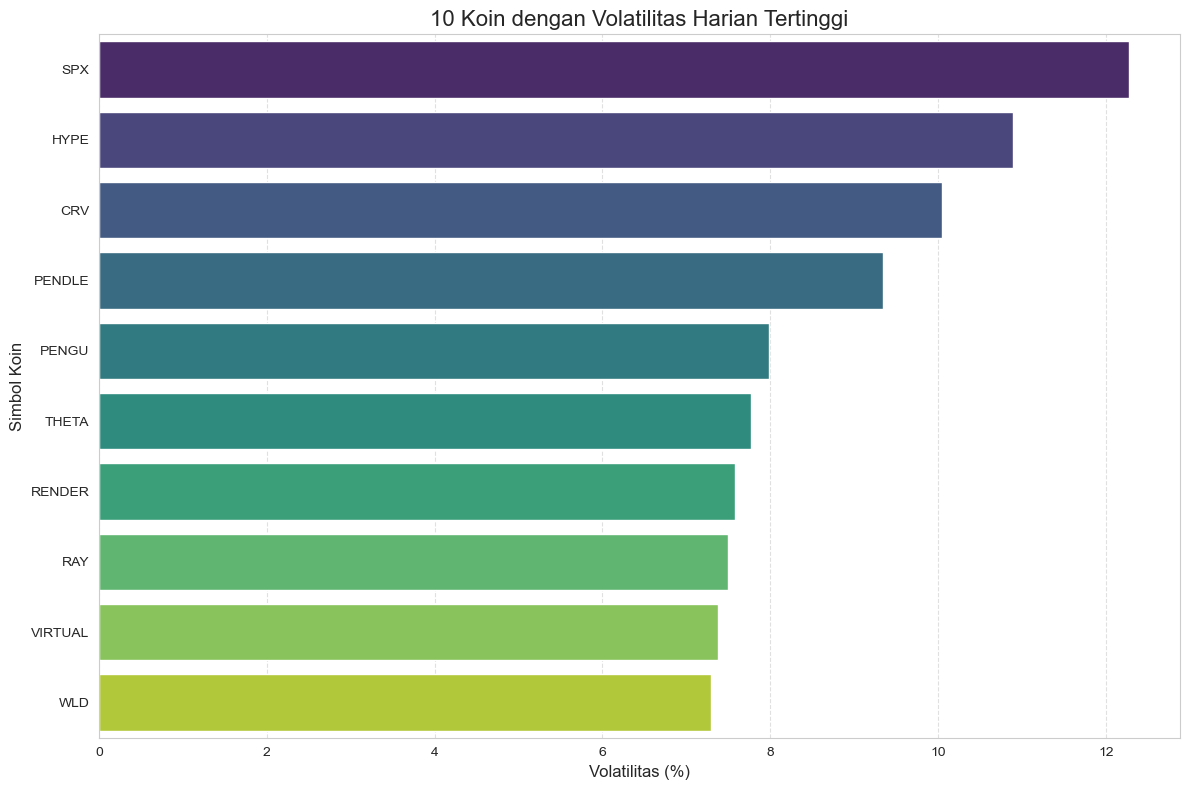

In [6]:
print("\n--- ANALISIS VOLATILITAS 10 KOIN TERTINGGI ---")

# Pastikan hanya menggunakan data terbaru per koin
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
else:
    latest_data = dataFrame.copy()

# Cek apakah kolom 'high_24h' dan 'low_24h' tersedia
if 'high_24h' in latest_data.columns and 'low_24h' in latest_data.columns:
    # Hitung volatilitas sebagai persentase dari harga rendah ke harga tinggi
    latest_data['volatility_percent'] = ((latest_data['high_24h'] - latest_data['low_24h']) / latest_data['low_24h']) * 100
else:
    print("Kolom 'high_24h' atau 'low_24h' tidak ditemukan. Menggunakan 'percent_change_24h' sebagai proxy.")
    latest_data['volatility_percent'] = abs(latest_data['percent_change_24h'])

# Urutkan berdasarkan volatilitas dan ambil 10 teratas
top_volatile = latest_data.sort_values(by='volatility_percent', ascending=False).head(10).copy()

# Visualisasi 10 koin ter-volatil dengan bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_volatile,
    x='volatility_percent',
    y='symbol',
    palette='viridis', # Menggunakan palet warna yang menarik
    orient='h'
)
plt.title('10 Koin dengan Volatilitas Harian Tertinggi', fontsize=16)
plt.xlabel('Volatilitas (%)', fontsize=12)
plt.ylabel('Simbol Koin', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
